# Car Price Prediction Using Machine learning

### Details about the project
The data come from the Kaggle dataset "Car Features and MSRP" de Kaggle. It describes almost 12 000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features. This study aims at performing some data manipulations and define a statistical model to predict the price of a car

## data description

In [92]:
# Make                Car Make
# Model               Car Model
# Year                Car Year (Marketing)
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price

#### Importing Essential libraries

In [93]:
import pandas as pd 
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected = True)

#### Loading Dataset ehich downloaded from (https://www.kaggle.com/CooperUnion/cardataset)

In [94]:
car = pd.read_csv('data.csv')

In [95]:
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


#### looking for null values

In [96]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#### dropping null values

In [97]:
car = car.dropna()

In [98]:
car

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


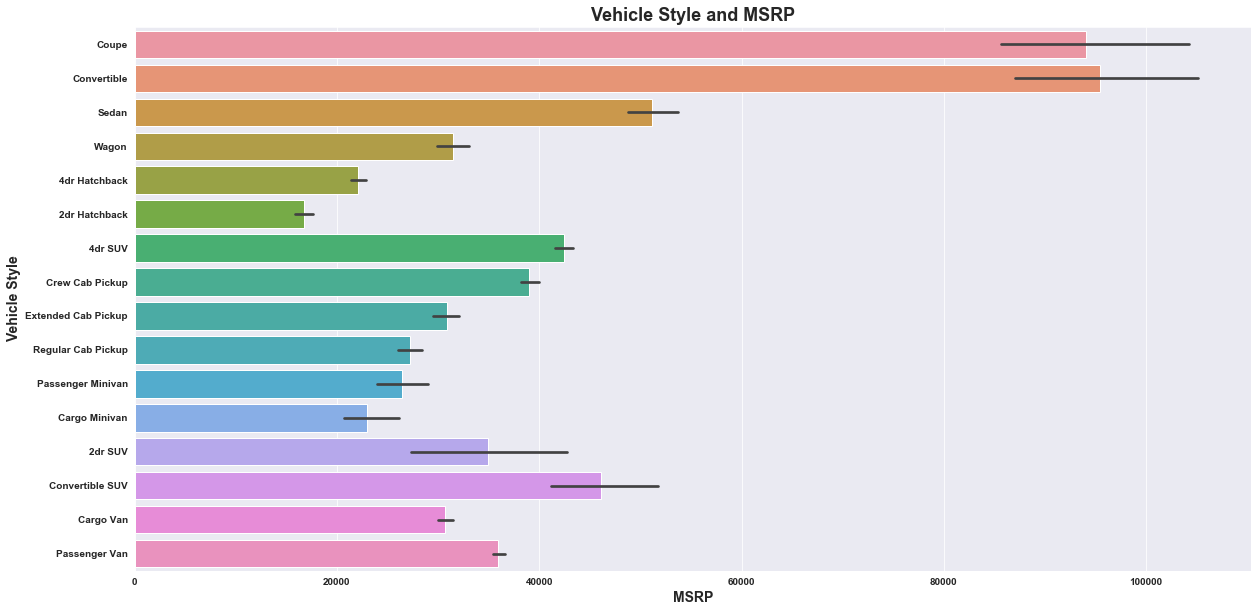

In [99]:
sns.set({'figure.figsize':(20,10)})
VS = sns.barplot(x=car['MSRP'], y=car['Vehicle Style'])
plt.title('Vehicle Style and MSRP', weight='bold', fontsize=18)
plt.xlabel('MSRP', weight='bold',fontsize=14)
plt.ylabel('Vehicle Style', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

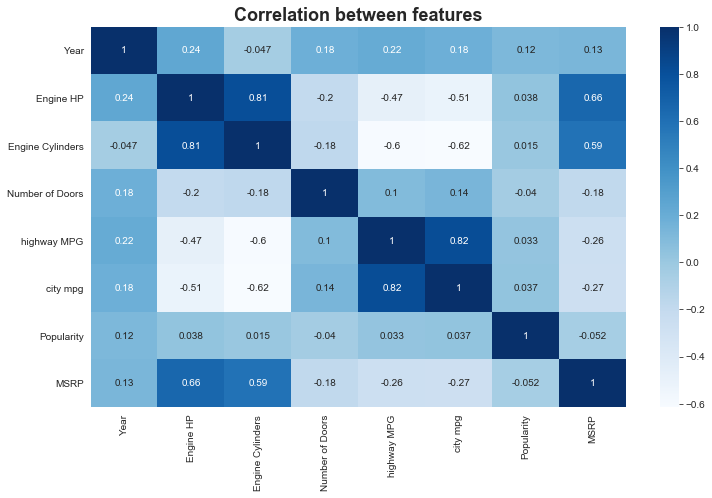

In [100]:
car_corr=car.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(car_corr, annot = True, cmap='Blues')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.show()

##### the above heatmap shows high correlation btw
(i) Engine Cylinders And Engines hp
(ii) City MPG and Highway Mpg

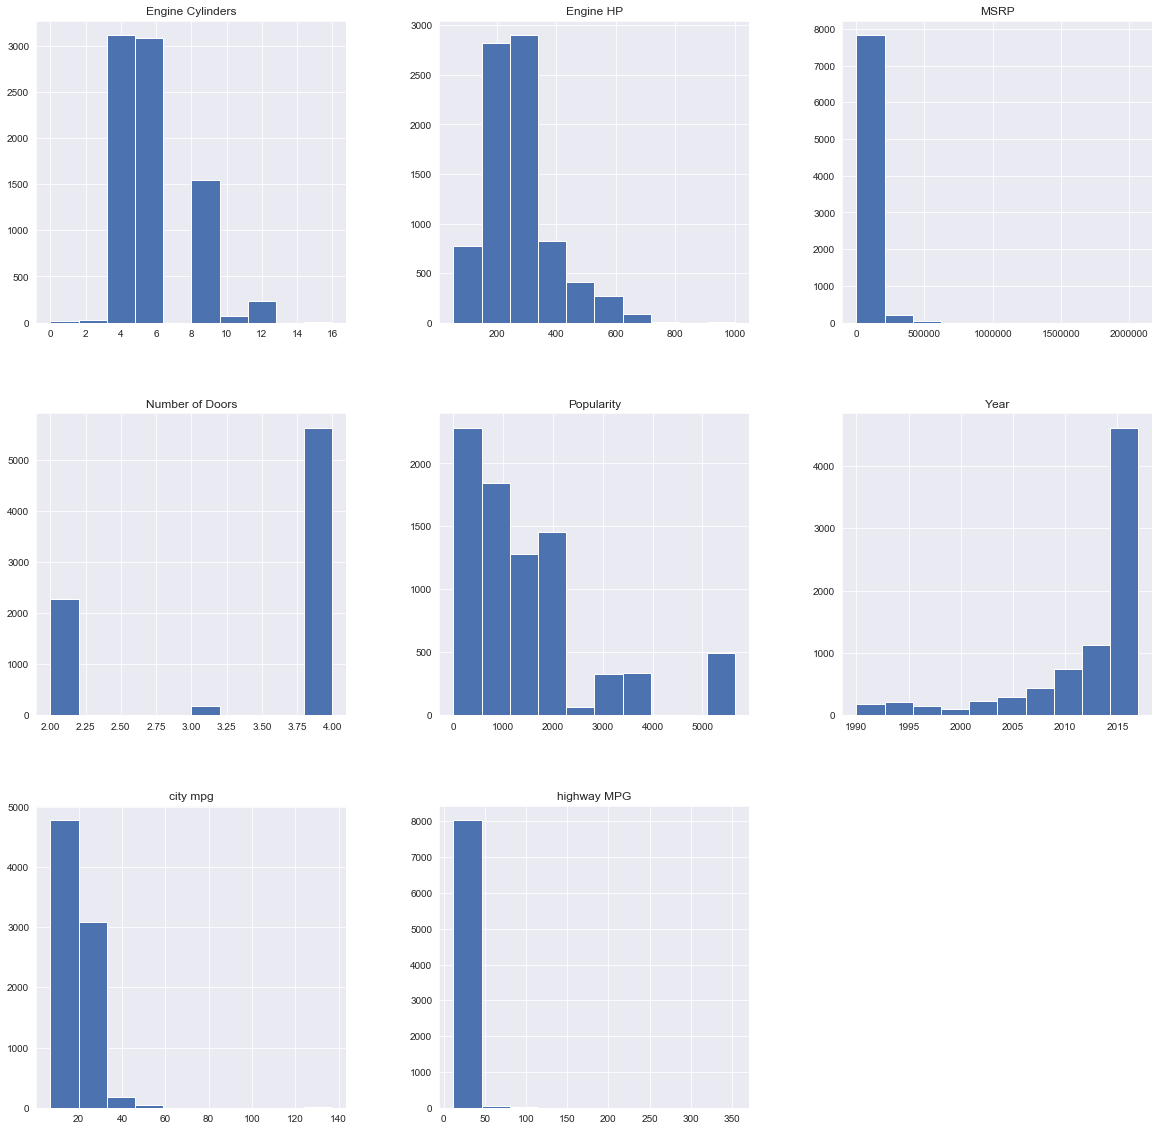

In [101]:
car.hist(figsize = (20,20))
plt.show()

#### Getting Dummy Variables for Categorical Data

In [102]:
car = pd.get_dummies(car)
car.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Dividing Dataset into dependent and independent vars

In [103]:
X = car.drop(['MSRP'], axis=1)
y = car['MSRP']

In [104]:
X.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [105]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 8084, dtype: int64

#### Dividing Dataset into Test and Training Sets

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Defining a function for the Results And Plots

In [121]:
def results(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # using heatmap to plot accuracy
    plt.scatter(y_test,y_pred)
    plt.xlabel('Predicted values', fontsize = 21)
    plt.ylabel('True values', fontsize = 21)
    plt.show()

### Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=2 ,max_features='sqrt', max_depth=80, bootstrap=True)
regressor.fit(X_train,y_train)
y_pred_rf = regressor.predict(X_test)

Random Forest
MAE 7218.515623977016
RMSE 34356.06858261143


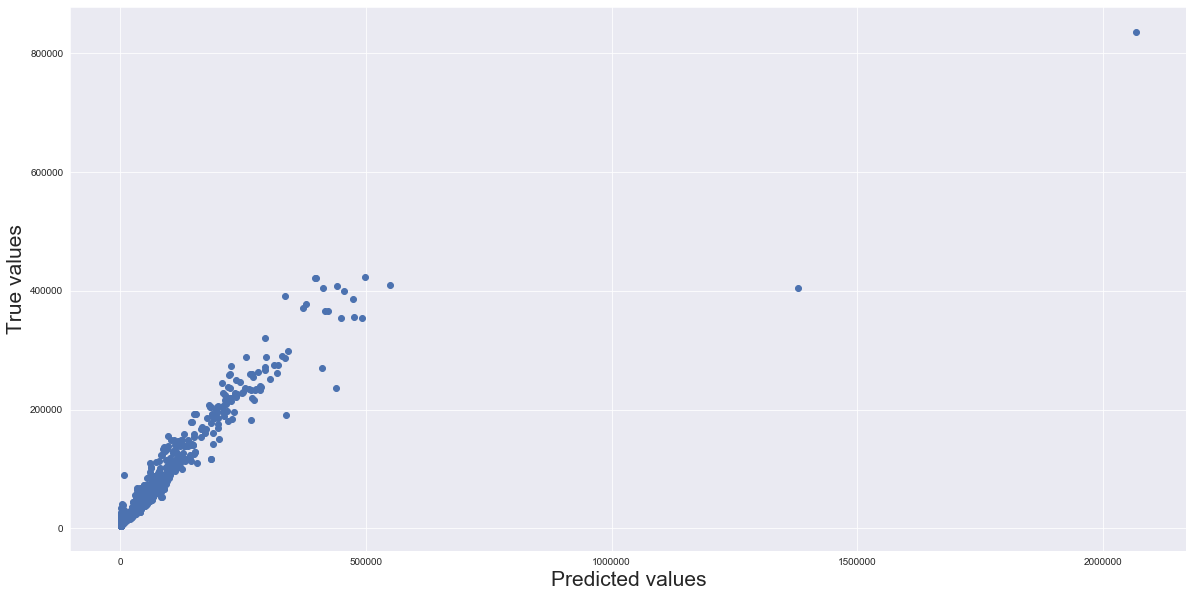

In [123]:
print("Random Forest")
results(y_pred_rf,y_test)

### Decision Tree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(max_depth=5)
regr.fit(X_train,y_train)
y_pred_dtree=regr.predict(X_test)

Decision Tree Regressor
MAE 11224.839746629397
RMSE 24385.98349508022


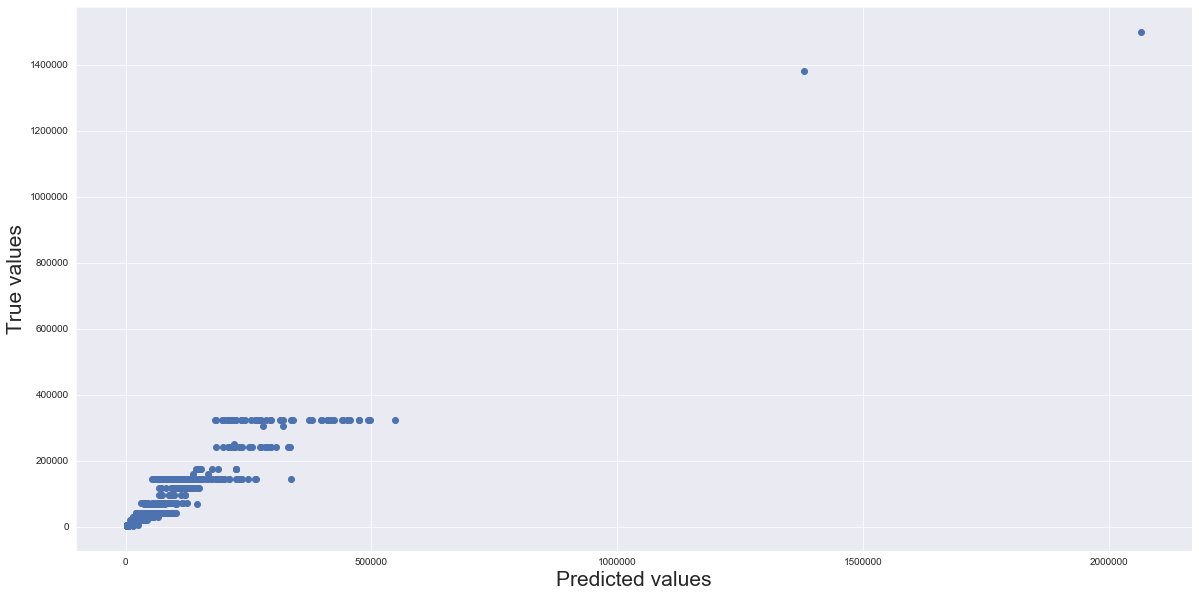

In [125]:
print("Decision Tree Regressor")
results(y_pred_dtree, y_test)

#### ADA Boost Regressor

In [126]:
from sklearn.ensemble import AdaBoostRegressor
regr=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=291)
regr.fit(X_train,y_train)
y_pred_adat=regr.predict(X_test)

ADABoost Regressor
MAE 47611.03154596464
RMSE 51684.80081460381


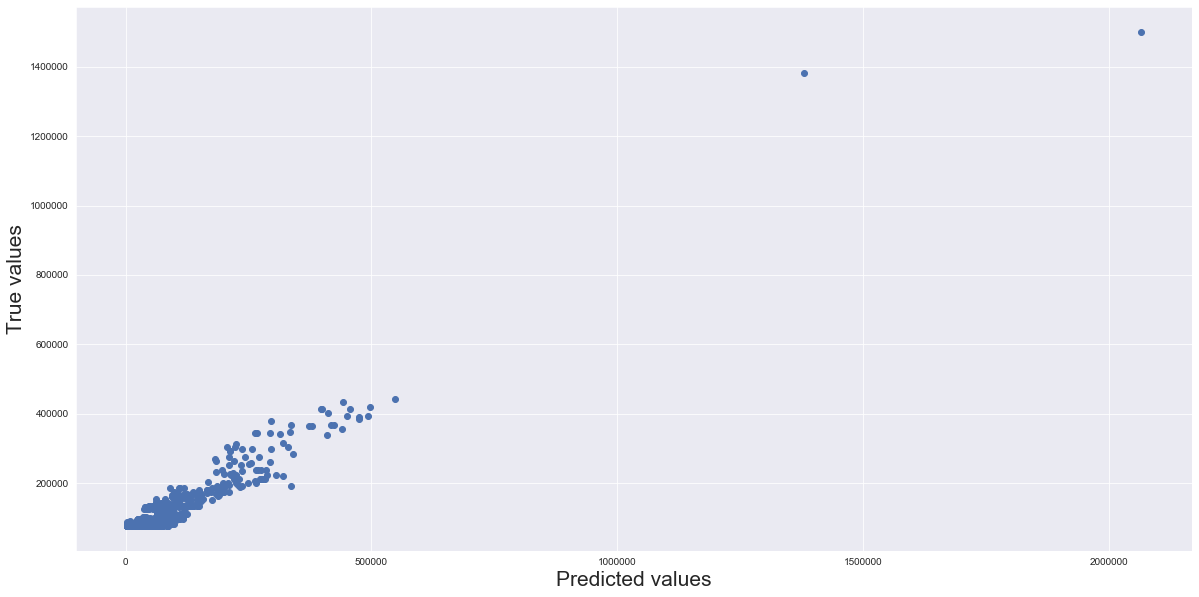

In [127]:
print("ADABoost Regressor")
results(y_pred_adat,y_test)

### Ridge Regression

In [128]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=50)
rr.fit(X_train,y_train)
y_pred_ridge = rr.predict(X_test)

Ridge Regression
MAE 15696.522267135964
RMSE 44676.903371607885


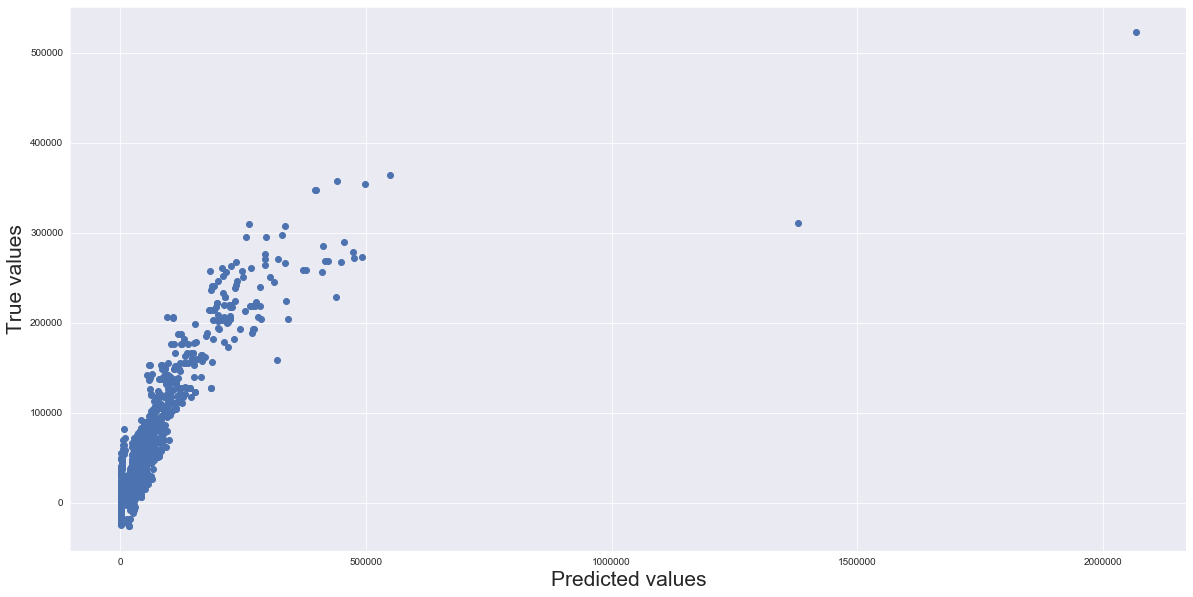

In [129]:
print("Ridge Regression")
results(y_pred_ridge,y_test)

In [1]:
# Car Price models Using Machine learning